In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train = pd.read_csv("preprocessed_train_data.csv", index_col = 0)
test = pd.read_csv("preprocessed_test_data.csv", index_col = 0)

trained_tweets = train['keyword']+train['text']
test_tweets = test['keyword']+test['text']

In [3]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(trained_tweets)
# X_test = scaler.transform(test_tweets)

In [4]:
state = 12  
test_size = 0.30
  
X_train, X_test, y_train, y_test = train_test_split(trained_tweets, train['target'],  
    test_size=test_size, random_state=state)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

word_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 3),
    lowercase=True,
    min_df=5,
    max_features=30000)

char_vectorizer = TfidfVectorizer(
    analyzer='char',
    stop_words='english',
    ngram_range=(3, 6),
    lowercase=True,
    min_df=5,
    max_features=50000)

vectorizer = FeatureUnion([('word_vectorizer', word_vectorizer),  ('char_vectorizer', char_vectorizer)])
vectorizer.fit(X_train)

X_train_vectors = vectorizer.transform(X_train).toarray()
X_test_vectors = vectorizer.transform(X_test).toarray()
print(X_train_vectors.shape, X_test_vectors.shape)

/home/neptune/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


(5329, 44132) (2284, 44132)


In [7]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_vectors, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.566
Accuracy score (validation): 0.586
Learning rate:  0.075
Accuracy score (training): 0.568
Accuracy score (validation): 0.588
Learning rate:  0.1
Accuracy score (training): 0.569
Accuracy score (validation): 0.590
Learning rate:  0.25
Accuracy score (training): 0.606
Accuracy score (validation): 0.622
Learning rate:  0.5
Accuracy score (training): 0.609
Accuracy score (validation): 0.623
Learning rate:  0.75
Accuracy score (training): 0.610
Accuracy score (validation): 0.624
Learning rate:  1
Accuracy score (training): 0.610
Accuracy score (validation): 0.624


In [8]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=20, max_depth=5, random_state=0)
    gb_clf.fit(X_train_vectors, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.609
Accuracy score (validation): 0.629
Learning rate:  0.075
Accuracy score (training): 0.636
Accuracy score (validation): 0.650
Learning rate:  0.1
Accuracy score (training): 0.661
Accuracy score (validation): 0.668
Learning rate:  0.25
Accuracy score (training): 0.739
Accuracy score (validation): 0.721
Learning rate:  0.5
Accuracy score (training): 0.767
Accuracy score (validation): 0.734
Learning rate:  0.75
Accuracy score (training): 0.766
Accuracy score (validation): 0.728
Learning rate:  1
Accuracy score (training): 0.769
Accuracy score (validation): 0.718


In [9]:
lr_list = [0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=100, max_depth=10, random_state=0)
    gb_clf.fit(X_train_vectors, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))

Learning rate:  0.25
Accuracy score (training): 0.870
Accuracy score (validation): 0.765
Learning rate:  0.5
Accuracy score (training): 0.904
Accuracy score (validation): 0.750
Learning rate:  0.75
Accuracy score (training): 0.913
Accuracy score (validation): 0.749
Learning rate:  1
Accuracy score (training): 0.910
Accuracy score (validation): 0.731


In [10]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=60, max_depth=6, random_state=0)
    gb_clf.fit(X_train_vectors, y_train)
    
    predictions = gb_clf.predict(X_test_vectors)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))
    print("F1 Score: {0:.3f}".format(f1_score(y_test,predictions)))
    print("Recall: {0:.3f}".format(recall_score(y_test,predictions)))
    print("Precision: {0:.3f}".format(precision_score(y_test,predictions)))
    

Learning rate:  0.05
Accuracy score (training): 0.797
Accuracy score (validation): 0.756
F1 Score: 0.623
Recall: 0.486
Precision: 0.867
Learning rate:  0.075
Accuracy score (training): 0.835
Accuracy score (validation): 0.772
F1 Score: 0.665
Recall: 0.545
Precision: 0.852
Learning rate:  0.1
Accuracy score (training): 0.854
Accuracy score (validation): 0.779
F1 Score: 0.687
Recall: 0.583
Precision: 0.835
Learning rate:  0.25
Accuracy score (training): 0.920
Accuracy score (validation): 0.782
F1 Score: 0.713
Recall: 0.650
Precision: 0.789
Learning rate:  0.5
Accuracy score (training): 0.966
Accuracy score (validation): 0.757
F1 Score: 0.688
Recall: 0.647
Precision: 0.736
Learning rate:  0.75
Accuracy score (training): 0.973
Accuracy score (validation): 0.755
F1 Score: 0.696
Recall: 0.676
Precision: 0.718
Learning rate:  1
Accuracy score (training): 0.977
Accuracy score (validation): 0.744
F1 Score: 0.686
Recall: 0.673
Precision: 0.700


In [11]:

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=70, max_depth=20, random_state=0)
    gb_clf.fit(X_train_vectors, y_train)
    
    predictions = gb_clf.predict(X_test_vectors)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))
    print("F1 Score: {0:.3f}".format(f1_score(y_test,predictions)))
    print("Recall: {0:.3f}".format(recall_score(y_test,predictions)))
    print("Precision: {0:.3f}".format(precision_score(y_test,predictions)))
    

Learning rate:  0.05
Accuracy score (training): 0.950
Accuracy score (validation): 0.792
F1 Score: 0.717
Recall: 0.636
Precision: 0.823
Learning rate:  0.075
Accuracy score (training): 0.977
Accuracy score (validation): 0.792
F1 Score: 0.723
Recall: 0.654
Precision: 0.807
Learning rate:  0.1
Accuracy score (training): 0.987
Accuracy score (validation): 0.791
F1 Score: 0.726
Recall: 0.666
Precision: 0.798
Learning rate:  0.25
Accuracy score (training): 0.989
Accuracy score (validation): 0.788
F1 Score: 0.724
Recall: 0.670
Precision: 0.788
Learning rate:  0.5
Accuracy score (training): 0.989
Accuracy score (validation): 0.776
F1 Score: 0.711
Recall: 0.665
Precision: 0.765
Learning rate:  0.75
Accuracy score (training): 0.989
Accuracy score (validation): 0.773
F1 Score: 0.706
Recall: 0.657
Precision: 0.763
Learning rate:  1
Accuracy score (training): 0.988
Accuracy score (validation): 0.766
F1 Score: 0.699
Recall: 0.654
Precision: 0.751


In [12]:
#####Highest is 0.075 with validation accuracy 0.797

lr_list = [0.03, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=120, learning_rate=learning_rate, max_features=100, max_depth=25, random_state=0)
    gb_clf.fit(X_train_vectors, y_train)
    
    predictions = gb_clf.predict(X_test_vectors)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))
    print("F1 Score: {0:.3f}".format(f1_score(y_test,predictions)))
    print("Recall: {0:.3f}".format(recall_score(y_test,predictions)))
    print("Precision: {0:.3f}".format(precision_score(y_test,predictions)))
    

Learning rate:  0.03
Accuracy score (training): 0.962
Accuracy score (validation): 0.789
F1 Score: 0.717
Recall: 0.645
Precision: 0.807
Learning rate:  0.05
Accuracy score (training): 0.983
Accuracy score (validation): 0.789
F1 Score: 0.723
Recall: 0.666
Precision: 0.792
Learning rate:  0.075
Accuracy score (training): 0.988
Accuracy score (validation): 0.789
F1 Score: 0.723
Recall: 0.665
Precision: 0.793
Learning rate:  0.1
Accuracy score (training): 0.989
Accuracy score (validation): 0.790
F1 Score: 0.728
Recall: 0.678
Precision: 0.786
Learning rate:  0.25
Accuracy score (training): 0.989
Accuracy score (validation): 0.775
F1 Score: 0.709
Recall: 0.660
Precision: 0.766
Learning rate:  0.5


KeyboardInterrupt: 

In [6]:
gb_clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.075, max_features=100, max_depth=25, random_state=0)
gb_clf.fit(X_train_vectors, y_train)
    
predictions = gb_clf.predict(X_test_vectors)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_vectors, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_vectors, y_test)))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy score (training): 0.988
Accuracy score (validation): 0.789

Confusion Matrix:
[[1172  164]
 [ 318  630]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1336
           1       0.79      0.66      0.72       948

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284



Confusion matrix, without normalization
[[1172  164]
 [ 318  630]]


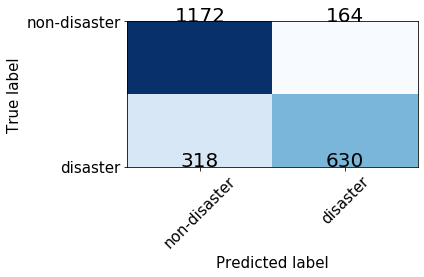

In [16]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

class_names = ['non-disaster','disaster']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 15)
    plt.yticks(tick_marks, classes,fontsize = 15)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize = 20)

    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label', fontsize = 15)
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

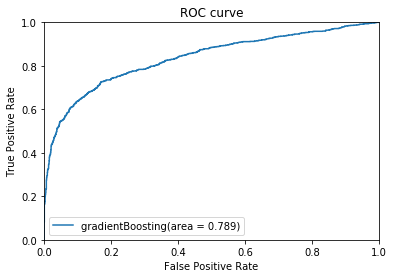

In [17]:
from sklearn.metrics import roc_curve, auc

# We'll need class probabilities from each of the classifiers
y_clf  = gb_clf.predict_proba(X_test_vectors)
# Compute the points on the curve
# We pass the probability of the second class (KIA) as the y_score
curve_clf   = roc_curve(y_test, y_clf[:, 1])

# Compute Area Under the Curve
auc_clf   = auc(curve_clf[0], curve_clf[1])

plt.plot(curve_clf[0], curve_clf[1], label='gradientBoosting(area = %0.3f)' % gb_clf.score(X_test_vectors, y_test))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

plt.legend();